# Assignment 2 - Continuous Visualization

Imagine you're a data scientist working for the University of Michigan teaching and learning team, and one of your job responsibilities is to offer instructional advice based on course performance metrics. As part of this activity you might be asked to analyze student's grade distribution in a range of undergraduate and graduate level courses to draw comparisons between courses and come up with insights regarding how to enhance residential education across different subjects.

## Question 1: Grade Distribution Comparison (60%)

You have been given a sample data file `assets/class_grades.csv` for a number of courses, and you have been asked to consider the letter grades for STATS 250, DATASCI 306, MATH 217, ENGLISH 125, ECON 101, EECS 545 for the past records since 2015. The student grades are stored in 6 columns: 
* `STATS250_grade` stores the letter grades for those who took the STATS 250 course
* `DATASCI306_grade` stores the letter grades for those who took the DATASCI 306 course
* `MATH217_grade` stores the letter grades for those who took the MATH 217 course
* `ENGLISH125_grade` stores the letter grades for those who took the ENGLISH 125 course
* `ECON101_grade` stores the letter grades for those who took the ECON 101 course
* `EECS545_grade` stores the letter grades for those who took the EECS 545 course

Prior to drawing plots for student grade distribution, it's useful to compute the total student enrollments for each course (of course, you need to ignore NAN values) and convert student's letter grades into standard grade points. Here's a nice table on the grade point systems available at the umich website:

| Letter Grade | Grade Point |
|:---: |:----:|
| A+ | 4.3 |
| A | 4.0 |
| A- | 3.7 |
| B+ | 3.3 |
| B | 3 |
| B- | 2.7 |
| C+ | 2.3 |
| C | 2 |
| C- | 1.7 |
| D+ | 1.3 |
| D | 1 |
| D- | 0.7 |
| E | 0 |

You are asked to:
* Make a **3 * 2** figure (so 6 subplots) such that for each course you have a **histogram** using the student grade samples respectively
* Remove the gaps between the bars in the histograms if any
* For each probability plot, you should overlay a normal distribution with the same mean and standard deviation parameters as you see in the samples (you can calculate this!)
* You should of course use a legend on each plot to specify the corresponding course name and number of students involved. For example, you can draw a legend and specify "STATS 250, n=5000" to indicate that you are analyzing STATS 250 course with 5000 enrolled students records being used for analysis
* We want to demonstrate to the team why sample size is an important factor if you want to articulate performance issues. For the STATS 250 subpolot **only**, take a random sample of 100 student grades and overlay its corresponding t-distribution (with the same mean and standard deviation parameters as the normal distribution).

Hints:
* To make subplots, one good way to start with is to use `fig, ax = plt.subplot()`
* To remove the gaps that might show up in histograms, you can customize the `bins` parameter
* If you want to make histograms using the distplot function in seaborn package, you need to specify the parameters `kde = False` and `norm_hist = True`

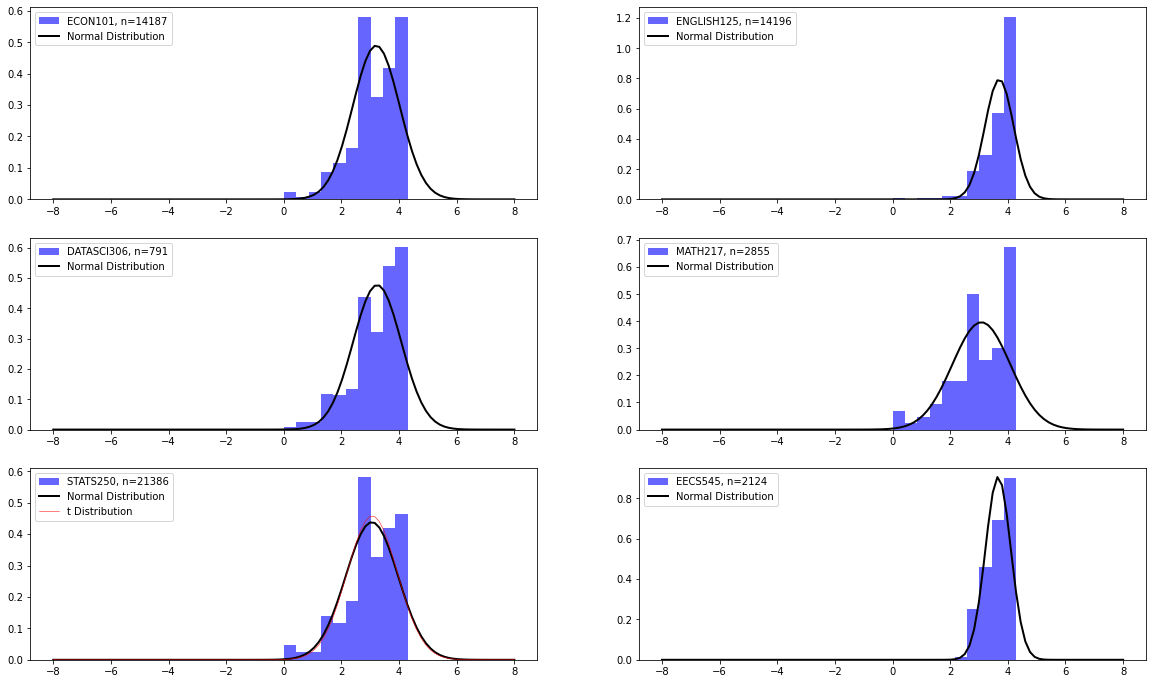

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def grade_distribution():

    import pandas as pd 
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats as stats
    from scipy.stats import norm
    import statistics
    %matplotlib inline

    df = pd.read_csv("assets/assets/class_grades.csv", index_col =0)

    grade_value = [0, 0.7, 1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0, 4.3]
    grade_key = ['E','D-', 'D','D+','C-', 'C','C+', 'B-', 'B','B+','A-', 'A','A+']



    res = {grade_key[i]: grade_value[i] for i in range(len(grade_key))}

    df = df.apply(lambda x: x.map(res), axis=1)
    coun = {}
    for col in df.columns:
        coun[col] = len(df[~df[col].isna()])
    #normalized_df=(df-df.mean())/df.std()
    normalized_df = df

    plt.figure(figsize=(20,12))
    ax1 = plt.subplot(321)
    ax2 = plt.subplot(322)
    ax3 = plt.subplot(323)
    ax4 = plt.subplot(324)
    ax5 = plt.subplot(325)
    ax6 = plt.subplot(326)
    z = zip([ax1,ax2,ax3,ax4,ax5,ax6],normalized_df.columns)

    for axx, col in z:
        mean, sd = norm.fit(normalized_df[~normalized_df[col].isna()][col]) 
    #     mean = normalized_df[col].mean()
    #     sd = normalized_df[col].std()
    #     xmin, xmax = plt.xlim()
        xmin, xmax = -8,8
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mean, sd)
        axx.hist(normalized_df[col], bins=10, density=True, alpha=0.6, color='b', label=f"{col[:-6]}, n={coun[col]}")
        axx.plot(x, p, linewidth=2, color = 'black',label="Normal Distribution")
        if col == "STATS250_grade":
            rand_values = df[col].sample(n = 100)
            mean, sd = norm.fit(rand_values)
            p = norm.pdf(x, mean, sd)
            axx.plot(x, p, linewidth=.5, color = 'r',label="t Distribution")

        axx.legend()
    
    return plt.show()

grade_distribution()

## Question 2: Grade Distribution Normality Check (40%)

Seeing the student grade distributions of the 6 large residential courses, the team is tempted to draft recommendations for instructors and report to them what particular aspects could be addressed to improve students' academic learning outcome. However, before they launch statistical tests, they need to verify if the student grades data approximately follows normal distribution, a sufficient condition rendering the design of statistical models valid for those courses. You suggest that a QQ-plot is a great method to determine how similar a distribution is to another. Great idea!
* Make a 3 * 2 figure (again, 6 subplots) so that for each course you have a QQ plot using the student grade samples versus the normal distribution with the same mean and standard deviation
* You need to use a legend on each plot to specify the corresponding course name and number of students involved. For example, you can draw a legend and specify "STATS 250, n=5000" to indicate that you are analyzing STATS 250 course with 5000 enrolled students records being used for analysis
* For each QQ-plot, mark observations which are 2 standard deviations outside from the QQ-line (a straight line showing the theoretical values for different quantiles under normal distribution).  Use annotations inside each subplot to highlight the outliers. I.e. data points that lie outside the 2 standard deviations on either side. Briefly describe the figure discussing the courses and whether they seem to be normally distributed.
* Write a couple of sentence about the figure discussing the courses and whether they seem to be normally distributed.

Hint: You may find using `fig = plt.figure()` and `fig.add_subplot()` functions helpful to create subplots. You don't have to use these functions though.

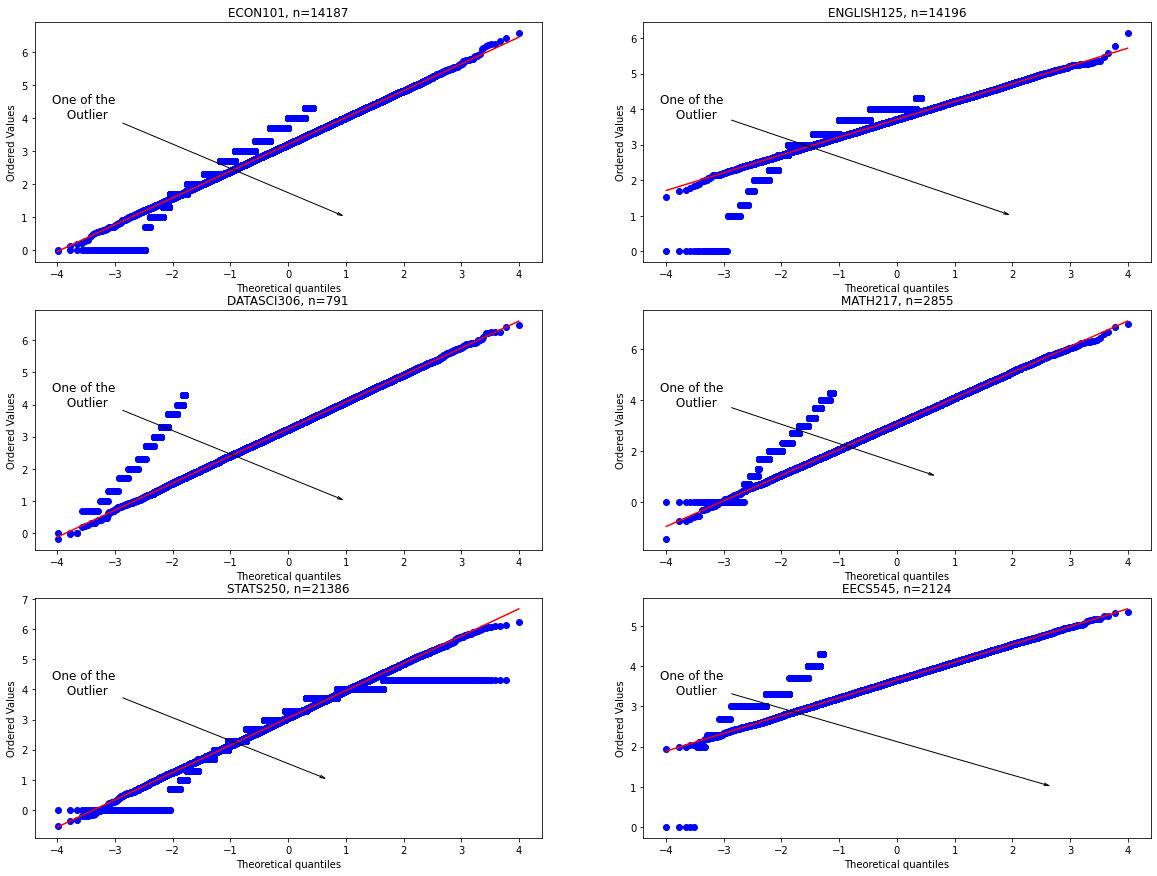

In [2]:
def grade_normality():
    
    import pandas as pd 
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats as stats
    from scipy.stats import norm
    import statistics
    %matplotlib inline

    df = pd.read_csv("assets/assets/class_grades.csv", index_col =0)

    grade_value = [0, 0.7, 1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0, 4.3]
    grade_key = ['E','D-', 'D','D+','C-', 'C','C+', 'B-', 'B','B+','A-', 'A','A+']



    res = {grade_key[i]: grade_value[i] for i in range(len(grade_key))}

    df = df.apply(lambda x: x.map(res), axis=1)
    coun = {}
    for col in df.columns:
        coun[col] = len(df[~df[col].isna()])
    #normalized_df=(df-df.mean())/df.std()
    normalized_df = df

    plt.figure(figsize=(20,15))
    ax1 = plt.subplot(321)
    ax2 = plt.subplot(322)
    ax3 = plt.subplot(323)
    ax4 = plt.subplot(324)
    ax5 = plt.subplot(325)
    ax6 = plt.subplot(326)
    z = zip([ax1,ax2,ax3,ax4,ax5,ax6],normalized_df.columns)

    for axx, col in z:
        mu, sigma = normalized_df[col].mean(), normalized_df[col].std()
        samples = np.random.normal(mu, sigma, len(normalized_df[col]))
        stats.probplot(normalized_df[col], dist=stats.norm, plot=axx)
        stats.probplot(samples, dist=stats.norm, plot=axx)
        c1 = normalized_df[col] > normalized_df[col].mean() + 2*normalized_df[col].std()
        c2 = normalized_df[col] < normalized_df[col].mean() - 2*normalized_df[col].std()
        #Collecting 1 sample out of the outliers so that annotation step becomes easier
        sam = sorted(normalized_df[col][c1| c2])[int(len(normalized_df[col][c1| c2])/2)]
        axx.annotate("One of the \n Outlier",xy=(sam, 1),xycoords='data', xytext=(.1, 0.6), textcoords='axes fraction', 
             fontsize=12, horizontalalignment='center',
             arrowprops=dict(arrowstyle='->, head_width=0.1', color='black', linewidth=1))
        
        axx.title.set_text(f"{col[:-6]}, n={coun[col]}")
    return plt.show()

grade_normality()

In [3]:
# About the Figure
#Some Courses like "DATASCI306" are very far from normal distribution whereas Courses like "STATS250" are 
#pretty close to normal distribution.
#May be it is based on the sample size, higher sample size making data more normal like.